# Portfolio #3
###  Using the TSP approximation to find the optimal route for a world tour surf trip

In [13]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np
import osmnx as ox
import contextily
from sklearn.metrics.pairwise import haversine_distances

First , I have decided on the beaches that are famous surf breaks that must be on my trip. Then I have gather the geographic locations. And I have saved each location as the name of the beach which it corresponds with. 

In [4]:
trestles = (33.386523641034, -117.58912964399954)
pipeline = (21.66449246084, -158.05249284929613)
bells = (-38.36165077500965, 144.26324524580073)
nazare = (39.60591802593299, -9.089066088526927)
uluwatu = (-8.813213496699737, 115.0923369131659)
escondido = (15.846872232404825, -97.05256545832012)
maderas = (11.292991620950458, -85.9107202430444)

In [5]:
locations = [trestles, pipeline, bells, nazare, uluwatu, escondido, maderas]

Next, I have imported the haversine package. This package allows me to access the distance in kilometers between two locations. I will use this function to compute the distance matrix.  

In [6]:
distances = haversine_distances(locations, locations)
distances = distances*(6371000/1000)
distances

array([[    0.        , 10308.0082569 , 12821.49265238,  3475.17118295,
        11399.62059504, 11110.38757134, 19152.88145072],
       [10308.0082569 ,     0.        , 15482.09337978,  8581.43198872,
        17951.77682692, 11859.40148588, 10205.48030625],
       [12821.49265238, 15482.09337978,     0.        , 12381.73893172,
         4544.80411716,  4743.66449507,  7150.95012475],
       [ 3475.17118295,  8581.43198872, 12381.73893172,     0.        ,
        13477.98616282,  8751.8148893 , 17398.13141608],
       [11399.62059504, 17951.77682692,  4544.80411716, 13477.98616282,
            0.        ,  9046.49340264,  8003.32719782],
       [11110.38757134, 11859.40148588,  4743.66449507,  8751.8148893 ,
         9046.49340264,     0.        ,  9432.84674   ],
       [19152.88145072, 10205.48030625,  7150.95012475, 17398.13141608,
         8003.32719782,  9432.84674   ,     0.        ]])

Now that we have the distance matrix. We can show this matrix as a map

In [7]:
from python_tsp.exact import solve_tsp_dynamic_programming
permutation, distance = solve_tsp_dynamic_programming(distances)


We will use the package above which uses a dynamic programming approach to compute the exact optimal route for the travelling salesperson tour, however this type of solution will only work on very small scale problems. As it is very computationally expensive to compute and store all the values of the possible path.


What is dynamic programming ? 
Dynamic programming is a coputational method to reduce calcutions of sub-problems that are repeated frequently by storing there value in a solution array where we can easily access the value instead of having to recompute it. 

How do we use dynamic programming to calculate the TSP?
As we know the TSP is an Np-Hard problem which means that there is no polynomial time algorithm (that we know of) that can give us the optimal solution. Unfortunately since dynamic programming is not an approximation algorithm and does return the optimal result it will also have a runtime that is larger than polynomial. However, when dealing with very  small problems an exponential runtime does not give us too many issues however as the problem grows a solution like dynammic programming is simply infeasible. Since  our problem is very small we do not have to worry about the runtime to find the optimal solution. While dynammic programming  is typically used to reduce the runtime of algorithms this strategy does not work well enough to reduce the runtime to polynomial. However, for some problems that are not NP-hard dynamic programming can be extremely useful. 
But what exactly is the packages dynamic programming solution actually doing ?
Well I'm not 100% sure as I did not write their algorithm however one way to use dynamic programming to compute the TSP problem is to use a recursive sequence. I have gotten the idea for this algorithm from https://www.geeksforgeeks.org/travelling-salesman-problem-using-dynamic-programming/ . Their algorithm uses the recursive statement of 

Their solution uses the assumption that the tour will start and end on the first node. 

If size of S is 2, then S must be {1, i},
 C(S, i) = dist(1, i) 
Else if size of S is greater than 2.
 C(S, i) = min { C(S-{i}, j) + dis(j, i)} where j belongs to S, j != i and j != 1.



 Other Approaches to solving TSP that are not exponential runtimes:
 To find a route for a TSP that will work on all problems we will have to use an approximation. One of the popular algorithms to approximate TSP is to use Dijkstra's algorithm to find the shortest path. Then after finding the shortest path we will join the last node in the path to the first node in the path. 
 

In [8]:
print([distance, permutation])

[50032.27044545719, [0, 3, 5, 2, 4, 6, 1]]


In [9]:
ebunch = []
for i in range(len(distances)):
    for j in range(len(distances)):
        thing = (i, j, {'weight': distances[i][j]})
        ebunch.append(thing)

ebunch

[(0, 0, {'weight': 0.0}),
 (0, 1, {'weight': 10308.0082568986}),
 (0, 2, {'weight': 12821.492652377028}),
 (0, 3, {'weight': 3475.1711829509104}),
 (0, 4, {'weight': 11399.620595037513}),
 (0, 5, {'weight': 11110.387571339714}),
 (0, 6, {'weight': 19152.88145072396}),
 (1, 0, {'weight': 10308.0082568986}),
 (1, 1, {'weight': 0.0}),
 (1, 2, {'weight': 15482.093379777454}),
 (1, 3, {'weight': 8581.431988717304}),
 (1, 4, {'weight': 17951.776826921356}),
 (1, 5, {'weight': 11859.40148587986}),
 (1, 6, {'weight': 10205.480306250274}),
 (2, 0, {'weight': 12821.492652377028}),
 (2, 1, {'weight': 15482.093379777454}),
 (2, 2, {'weight': 0.0}),
 (2, 3, {'weight': 12381.738931715758}),
 (2, 4, {'weight': 4544.804117159571}),
 (2, 5, {'weight': 4743.664495074734}),
 (2, 6, {'weight': 7150.95012475424}),
 (3, 0, {'weight': 3475.1711829509104}),
 (3, 1, {'weight': 8581.431988717304}),
 (3, 2, {'weight': 12381.738931715758}),
 (3, 3, {'weight': 0.0}),
 (3, 4, {'weight': 13477.986162822534}),
 (3, 5

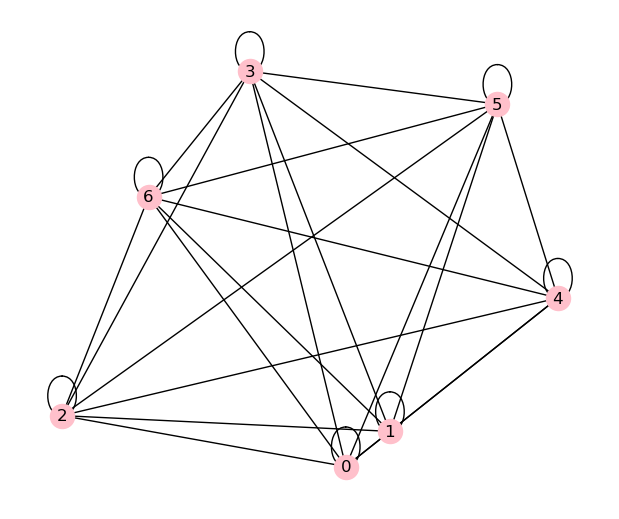

In [10]:
G = nx.Graph()
G.add_nodes_from(range(len(distances)))
G.add_edges_from(ebunch)
plt.figure(figsize=(6,5))
nx.draw(G,with_labels=True,node_color='pink')
plt.show()


In [11]:
def plot_tour(V,tour,figsize=(6,5)):
    n = V.shape[0]
    edges = [(tour[i],tour[i+1]) for i in range(0,len(tour)-1)] + [(tour[-1],tour[0])]
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(edges)
    plt.figure(figsize=figsize)
    nx.draw(G,pos=V,with_labels=True,node_color='lightblue')
    plt.show()

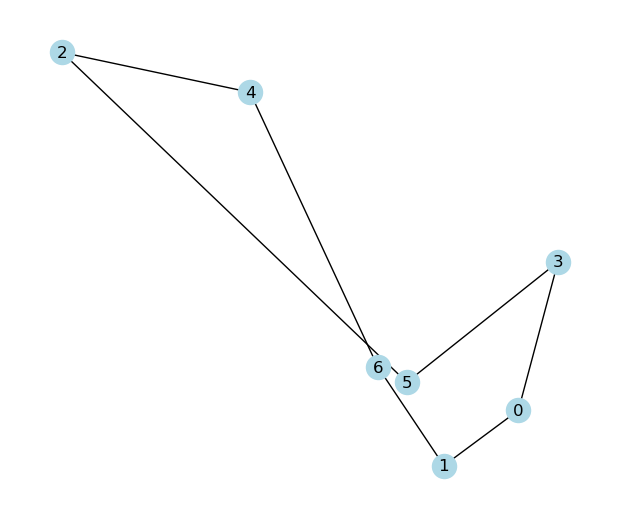

In [13]:
plot_tour(np.array(locations), permutation)

In [15]:
print(permutation)

[0, 3, 5, 2, 4, 6, 1]


This gives us the final route, first trestles which is located near San Diego , California, then Nazare which is in Portugal, then Playa Escondido which is located in Mexico, then to Bell's beach which is located in Australia, after we will head to Uluwatu which is located in Bali, Indonesia, then we will head to Playa Maderas which is located in Nicarugua, and lastly we will head to Pipeline which is located on Oahu, Hawaii then back to our original location of Trestles. This route does seem a little funky to me but the method we used is to compute the optimal path. So this is indeed the best possible route. 